# Difference in Differences with sci-kit learn models

In [1]:
import xarray as xr
from sklearn.linear_model import LinearRegression

import causalpy as cp

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data = cp.load_data("did")

In [4]:
result = cp.skl_experiments.DifferenceInDifferences(
    data,
    formula="y ~ 1 + group*post_treatment",
    time_variable_name="t",
    group_variable_name="group",
    treated=1,
    untreated=0,
    model=LinearRegression(),
)

/Users/benjamv/git/CausalPy/causalpy/skl_experiments.py:259: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_x.iloc[:, i] = 0


/Users/benjamv/mambaforge/envs/CausalPy/lib/python3.10/site-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


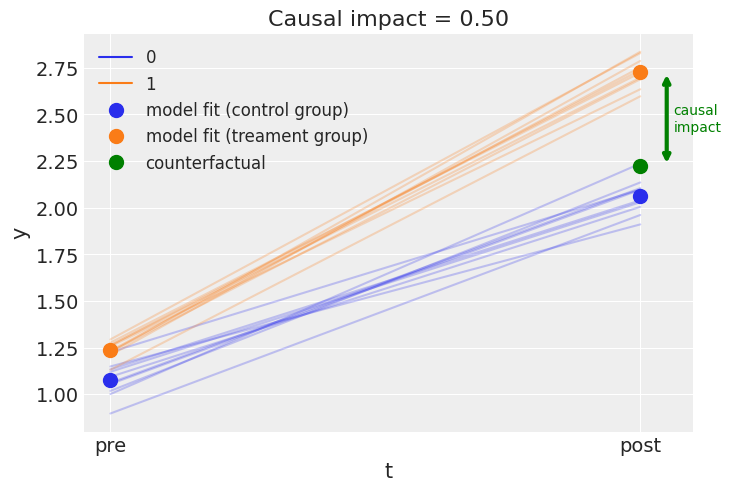

In [5]:
fig, ax = result.plot();